## Introduction
The purpose of this notebook is to illustrate through the use of an interface how KPrototype results were generated in the dissertation project. Due to confidentiality reasons, the dataset used here is not the same as the one used in completion of the dissertation. Furthermore, it is more useful to have a small-sized dataset to speed up the learning process. The dataset used is the Adult  Data Set, obtained form the University of California Irvine Machine Learning Repository [[1]](https://archive.ics.uci.edu/ml/datasets/Adult). It is composed of 48442 instances and 14 features intended to be used to predict whether an individual's income exceeds $50K. For convenience, a description of the features from [[1]]((https://archive.ics.uci.edu/ml/datasets/Adult)) has been copied and provided below. 

<div class="alert alert-block alert-info">
<ul>
<li> <b>age</b>: continuous. 
<li> <b>workclass</b>: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
<li> <b>fnlwgt</b>: continuous. 
<li> <b>education</b>: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th,  Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
<li> <b>education-num</b>: continuous. 
<li> <b>marital-status</b>: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
<li> <b>occupation</b>: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
<li> <b>relationship</b>: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
<li> <b>race</b>: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
<li> <b>sex</b>: Female, Male. 
<li> <b>capital-gain</b>: continuous. 
<li> <b>capital-loss</b>: continuous. 
<li> <b>hours-per-week</b>: continuous.</li> 
<li> <b>native-country</b>: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.</li>
</ul>
</div>


### Importing Packages
In this section the relevant packages and datasets are imported

In [1]:
import pandas as pd
from clusterlib.kprototype import KPrototypesInterface

### Downloading the Dataset
In this section the dataset is imported and a little cleaning is done to nominal encode the target variable in the dataset. This should enable it more easily be used in post clustering analysis

In [2]:
adult_df = pd.read_csv('notebook_data/dult.csv')
adult_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'notebook_data/dult.csv'

In [3]:
adult_df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [4]:
adult_df['income'] = adult_df['income'].map({' <=50K': 0, ' >50K': 1})
adult_df.rename(columns = {'income': 'high_income'}, inplace=True)
adult_df.head()

,age,workclass,fnlweight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,weekly_hours,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Categorical and Numerical Features
This is simply to identify the categorical features that will be used as an input to the interface. The categorical and numerical features identified here will also be used in filtering out data that should not be clustered. 

In [5]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlweight       32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  weekly_hours    32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  high_income     32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [6]:
# creating lists of numerical and categorical features
cat_features = adult_df.select_dtypes(exclude=['int64']).columns.tolist()
num_features = [col for col in adult_df.columns if col not in cat_features]
num_features.remove('high_income')

## KPrototypes
Below it is illustrated how to run the K-Prototype method

In [7]:
kproto = KPrototypesInterface(adult_df[cat_features + num_features], categorical_cols=cat_features)

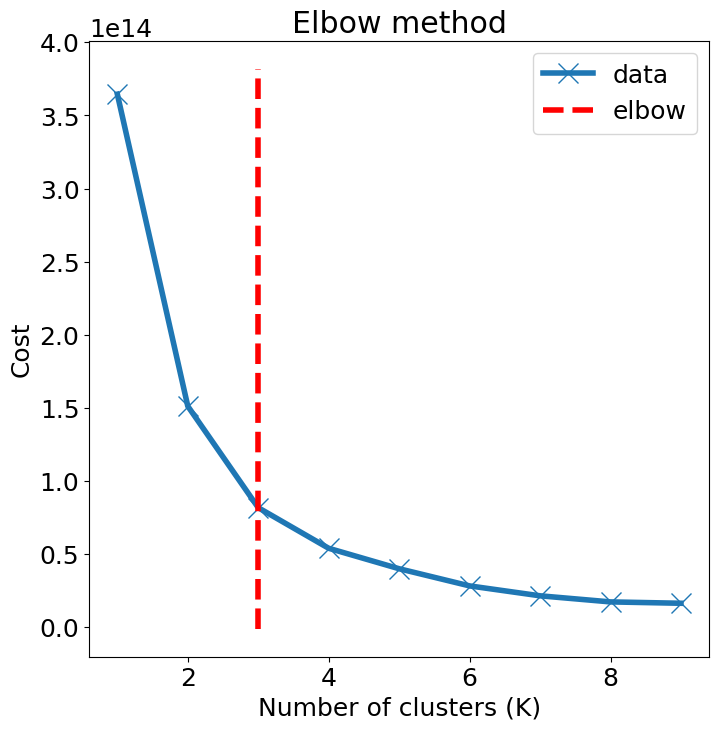

In [8]:
kproto.elbow_method(list(range(1,10)), verbose=0, n_jobs=1, n_init=1, elbow_locator=True) 

In [9]:
kproto.kprototype_cluster_summary(3, adult_df, sort_col='high_income')

,high_income,instance_count,age,fnlweight,education_num,capital_gain,capital_loss,weekly_hours,workclass,education,marital_status,occupation,relationship,race,sex,native_country
cluster_assignments,,,,,,,,,,,,,,,,
1,0.234300,4793,36.610056,377430.461715,9.914876,1124.819111,81.185479,40.272272,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
0,0.240423,15897,38.355413,205165.961502,10.058627,1044.436183,85.937724,40.314022,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
2,0.243956,11871,39.680650,93406.275714,10.177154,1103.080111,91.603572,40.669447,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [10]:
kproto.describe_approach_kprototype(3, adult_df, 'high_income', 'occupation')

{'feature': 'high_income',
 'param_clusters': 3,
 'param_num_init': 1,
 'min_cluster_size': 4793,
 'min_mean_cluster_high_income': 0.23430002086375964,
 'max_mean_cluster_high_income': 0.24395585881560106,
 'percent_potentially_mergeable': 100.0,
 'multicluster_occupation_count': 15,
 'occupation_unique_attributes': 15,
 'multicluster_occupation_percent': 100.0}

## References 
1. Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.